In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show
import scipy

In [4]:
base_dir = os.path.join(os.path.abspath(os.curdir), 'datasets')

In [5]:
classes = ['pokemon-a', 'pokemon-b']

In [6]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

train_a_dir = os.path.join(train_dir, 'pokemon-a')
train_b_dir = os.path.join(train_dir, 'pokemon-b')
validation_a_dir = os.path.join(val_dir, 'pokemon-a')
validation_b_dir = os.path.join(val_dir, 'pokemon-b')

In [7]:
num_a_tr = len(os.listdir(train_a_dir))
num_b_tr = len(os.listdir(train_b_dir))

num_a_val = len(os.listdir(validation_a_dir))
num_b_val = len(os.listdir(validation_b_dir))

total_train = num_a_tr + num_b_tr
total_val = num_a_val + num_b_val

In [8]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [9]:
image_gen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.5,
        zoom_range=0.5,
        horizontal_flip=True,
        rotation_range=45)

train_data_gen = image_gen.flow_from_directory(
        'datasets/train',
        shuffle=True,
        target_size=(150, 150),
        batch_size=100,
        class_mode='binary')

Found 1758 images belonging to 2 classes.


C:\Users\Vladislav\Desktop\Важное\Projects\Python\lr1\venv\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


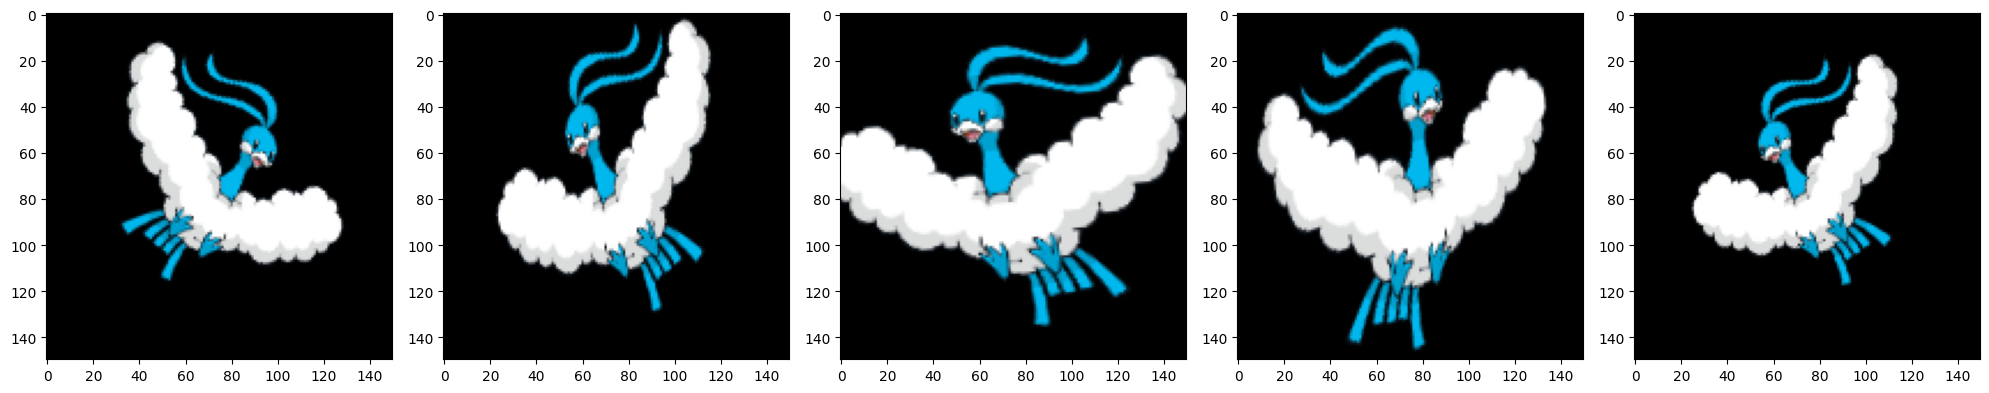

In [10]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [11]:
image_gen_val = ImageDataGenerator(
        rescale=1./255)

val_data_gen = image_gen.flow_from_directory(
        'datasets/val',
        target_size=(150, 150),
        class_mode='binary')

Found 1758 images belonging to 2 classes.


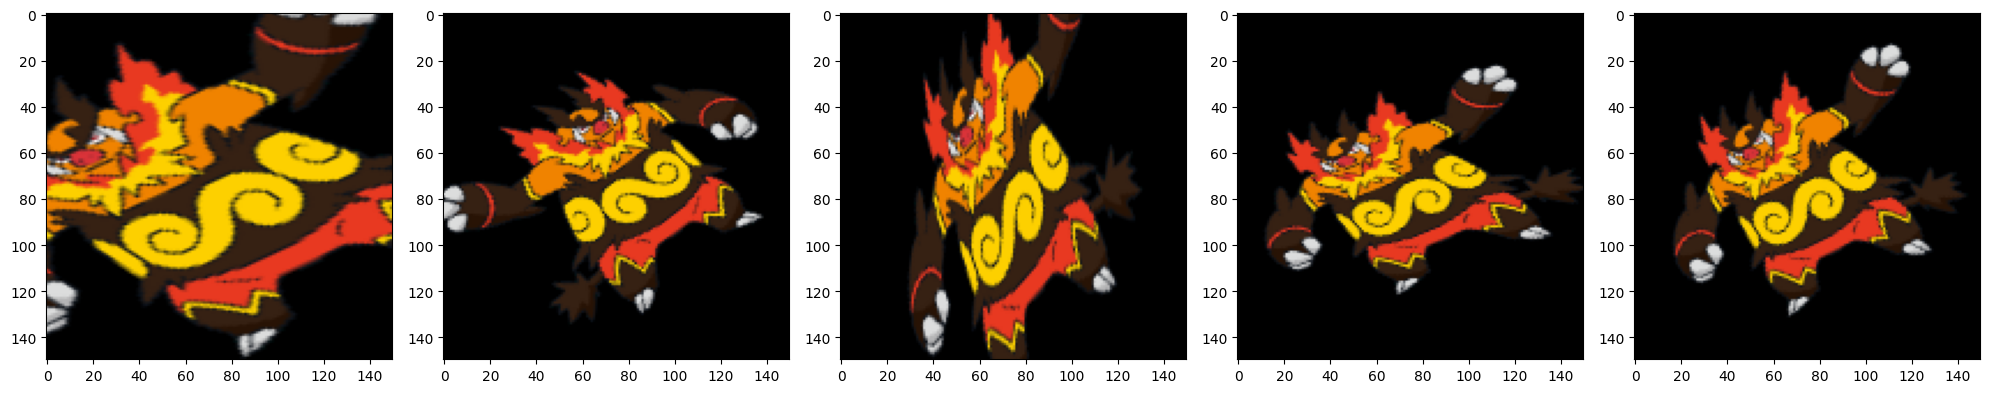

In [12]:
augmented_images = [val_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
EPOCHS = 30
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

C:\Users\Vladislav\AppData\Local\Temp\ipykernel_3728\1767553393.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
18/18 [==============================] - 23s 1s/step - loss: 0.1016 - accuracy: 0.9625 - val_loss: 0.1026 - val_accuracy: 0.9653
Epoch 2/10
18/18 [==============================] - 24s 1s/step - loss: 0.1007 - accuracy: 0.9613 - val_loss: 0.0877 - val_accuracy: 0.9757
Epoch 3/10
18/18 [==============================] - 28s 2s/step - loss: 0.0783 - accuracy: 0.9738 - val_loss: 0.0468 - val_accuracy: 0.9878
Epoch 4/10
18/18 [==============================] - 26s 1s/step - loss: 0.0713 - accuracy: 0.9772 - val_loss: 0.0610 - val_accuracy: 0.9792
Epoch 5/10
18/18 [==============================] - 23s 1s/step - loss: 0.0694 - accuracy: 0.9744 - val_loss: 0.0886 - val_accuracy: 0.9722
Epoch 6/10
18/18 [==============================] - 25s 1s/step - loss: 0.0830 - accuracy: 0.9704 - val_loss: 0.1037 - val_accuracy: 0.9670
Epoch 7/10
18/18 [==============================] - 28s 2s/step - loss: 0.0829 - accuracy: 0.9738 - val_loss: 0.0674 - val_accuracy: 0.9792
Epoch 8/10
18/18 [==

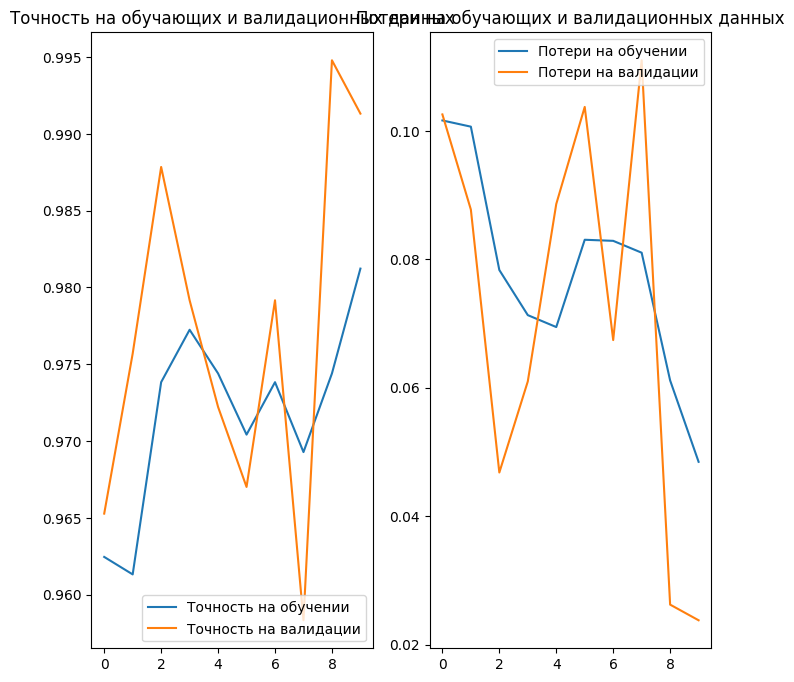

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

In [19]:
model.save_weights('pokemons.h5')